### ▶[Part1]. 데이터 준비
- 폴더별로 이미지를 준비함. 폴더명의 a,b,d.... 오름차순에 의하여 0,1,2,3의 레이블값이 제작됨

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# 데이터가 있는 폴더
data_dir='C:/data/clothes_dataset'

In [8]:
# 필수사항은 아님. 폴더안의 자료 확인차임.
from glob import glob
folderList=glob(data_dir + '/*')
total = 0
for folder  in folderList:
    print(folder)
    fileList=glob(folder + '/*' )
    print(len(fileList))
    total += len(fileList)
print('폴더의 갯수:',len(folderList))
print('전체 사진 갯수:',total)

C:/data/clothes_dataset\black_dress
450
C:/data/clothes_dataset\black_pants
871
C:/data/clothes_dataset\black_shirt
715
C:/data/clothes_dataset\black_shoes
772
C:/data/clothes_dataset\black_shorts
429
C:/data/clothes_dataset\blue_dress
502
C:/data/clothes_dataset\blue_pants
798
C:/data/clothes_dataset\blue_shirt
741
C:/data/clothes_dataset\blue_shoes
773
C:/data/clothes_dataset\blue_shorts
557
C:/data/clothes_dataset\brown_pants
311
C:/data/clothes_dataset\brown_shoes
464
C:/data/clothes_dataset\brown_shorts
40
C:/data/clothes_dataset\green_pants
227
C:/data/clothes_dataset\green_shirt
230
C:/data/clothes_dataset\green_shoes
455
C:/data/clothes_dataset\green_shorts
135
C:/data/clothes_dataset\red_dress
800
C:/data/clothes_dataset\red_pants
308
C:/data/clothes_dataset\red_shoes
610
C:/data/clothes_dataset\white_dress
818
C:/data/clothes_dataset\white_pants
274
C:/data/clothes_dataset\white_shoes
600
C:/data/clothes_dataset\white_shorts
120
폴더의 갯수: 24
전체 사진 갯수: 12000


### ▶[Part2.] Keras 유틸리티를 사용하여 데이터 로드하기
- 학습자료가 npy,npz라면 아래 작업을 하지 않아도 된다 (model.fit 고고)
- 사용자가 설정한 배치크기만큼 x,y 데이터셋을 제작하는 과정
     - 이미지크기를 지정한 사이즈로 통일하고
     - x데이터를 세트로 array 시키고
     - y값은 폴더이름에 따라서 순차적으로 0,1,2,3....4를 부여함
     - 폴더이름을 class_names에 할당
- x,y값을 사용자가 지정한 비율에 맟추어서 train, test로 분리

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  subset="training",   #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  subset="validation",    #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12000 files belonging to 24 classes.
Using 9600 files for training.
Found 12000 files belonging to 24 classes.
Using 2400 files for validation.


In [12]:
# 폴더명을 가져옴
class_names = train_ds.class_names
print(class_names)

['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_pants', 'brown_shoes', 'brown_shorts', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts', 'red_dress', 'red_pants', 'red_shoes', 'white_dress', 'white_pants', 'white_shoes', 'white_shorts']


In [13]:
################# 참고 [필수 아님]
# 633+898+641+699+799  총 3670개 자료
# validation_split=0.2  ==> 총 3670개중 80%는 train, 20%는 test
# train이 2936개이며, 이걸 배치사이즈로 32개씩 묶으면 91.75 ===> 92 개 묶음이 생김

# 12000*0.8 = 9600개
# 9600/32 = 300묶음
len(list(train_ds))

300

In [40]:
################# 참고 [필수 아님]
list(train_ds)[0]   # 32개의 이미지와 레이블이 있는 92개중 1번 묶음(이미지, 레이블)
list(train_ds)[0][0]    #  32개의 이미지, [0][1] - 라벨
list(train_ds)[0][0][0] # 32개 중 첫번째 이미지
list(train_ds)[0][0][0][0]  # 이미지의 첫번째 행
list(train_ds)[0][0][0][0][0]  # 첫번째 행의 첫 픽셀
list(train_ds)[0][0][0][0][0][0]  # 첫번째 행의 첫 픽셀의 빨간색

<tf.Tensor: shape=(), dtype=float32, numpy=255.0>

In [18]:
# numpy.take 함수는 인덱스를 이용해서 어레이의 요소를 가져옵니다.
'''
import numpy as np

a = [4, 3, 5, 7, 6, 8]
indices = [[0, 1], [4, -1]]

print(np.take(a, indices))

[[4 3]
 [6 8]]
'''
list(train_ds.take(301)) # ?

[(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
  array([[[[255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           ...,
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ]],
  
          [[255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           ...,
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ]],
  
          [[255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           ...,
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ],
           [255.     , 255.     , 255.     ]],
  
          ...,
  
          [[255.     , 255.     ,

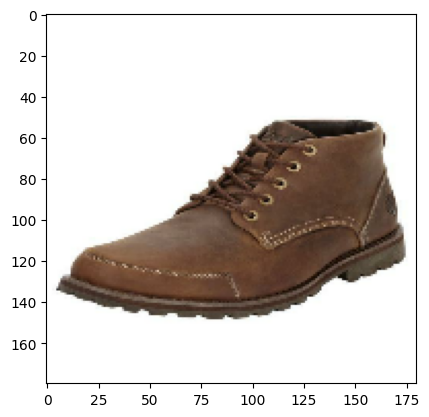

In [43]:
################# 참고 [필수 아님]
list(train_ds)[0][0] # 총 32개의 이미지
img=list(train_ds)[0][0][1].numpy().astype("uint8") # ? 왜 이미지가 바뀌지
plt.imshow(img)


### ▶[Part3.] 모델 제작


In [44]:
# 성능을 높이도록 데이터세트 구성하기
# ?
AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
## 증강 아래 내용외에 더 추가해도 됨  (아래의 사이트를 참조해서 다른 증강도 더 넣어도 되고, 또는 처음부터 이미지를 증강해서 준비해도 됨)
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip
# ?
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [49]:
### 모델 제작

num_classes = len(class_names)

# ? 1/255, 1./255 차이
# ? 토탈파람 왜 3백개? 22 * 22 * 64 + 1 * 128

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),      #모델안에 스케일링 넣어주면 새로운 데이터 넣어서 추론할때 스케일링을 하지 않아도 됨
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(), # 22 * 22 * 64개의 웨이트
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [47]:
model.summary()

# 파라미터 계산법
# layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))
# layers.Conv2D(16, 3, padding='same', activation='relu'),              ==> 3개의 input 채널임, 1개의 채널에는 3개의 커널사이즈가 있음. 즉 9개의 w값이 생성됨
#                                                                           1개채널당 9 * 3개채널 => 27개 + 바이어스1개 =>28개 --->  이런경우가 16개 있음 ===> 총 파람은 [28*16=448개]
# layers.Conv2D(32, 3, padding='same', activation='relu'),              ==> 16개의 input 채널임, 1개의 채널당 9(커널사이즈가 가로3*세로3) 개의 w+1개 바이어스(10개) 
#                                                                           1개채널당 9* 16개채널 => 144개 + 바이어스1개 ==> 145개 --> 이런경우가 32개 있음 ==> 총 파람은 [145*32=4640]
# layers.Conv2D(64, 3, padding='same', activation='relu'),              ==> 32개의 input 채널임, 1개의 채널당 9 * 32개채널 + 바이어스 1 =>289개  * 64개 경우 ==> 총 파람은 [289*64=18496]
# layers.Flatten()                                                      ==> 이미지사이즈 (22,22,64)를 모두 곱함.  30796
# layers.Dense(128, activation='relu'),                                 ==> 30976의 w + 1 개 b ===> 3977 * 128 = 3965056 파람
# layers.Dense(num_classes, activation='relu')                          ==> 128 의 w + 1개 b ==> 129*5=> 646개 파람

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/iris/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose기본값이 0임, 1을 지정하지 않으면 결과가 화면에 출력되지 않음



epochs=10
history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=[checkpointer]
)



Epoch 1/10


300/300 [==============================] - ETA: 0s - loss: 1.3429 - accuracy: 0.5926
Epoch 1: saving model to c:/data/model/iris\01-0.7379.hdf5
300/300 [==============================] - 63s 209ms/step - loss: 1.3429 - accuracy: 0.5926 - val_loss: 0.8325 - val_accuracy: 0.7379
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.7500 - accuracy: 0.7588
Epoch 2: saving model to c:/data/model/iris\02-0.8050.hdf5
300/300 [==============================] - 68s 228ms/step - loss: 0.7500 - accuracy: 0.7588 - val_loss: 0.6461 - val_accuracy: 0.8050
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.6054 - accuracy: 0.8085
Epoch 3: saving model to c:/data/model/iris\03-0.8308.hdf5
300/300 [==============================] - 83s 277ms/step - loss: 0.6054 - accuracy: 0.8085 - val_loss: 0.5516 - val_accuracy: 0.8308
Epoch 4/10
300/300 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.8305
Epoch 4: saving model to c:/data/model/iris\04-0

In [ ]:
import pandas as pd
hist_df=pd.DataFrame(history.history)
hist_df.head()


loss  accuracy  val_loss  val_accuracy
0  1.759198  0.390668  1.609438      0.284741
1  1.609437  0.298365  1.609438      0.287466
2  1.609437  0.297343  1.609438      0.287466
3  1.609437  0.293937  1.609438      0.287466
4  1.609437  0.293937  1.609438      0.287466

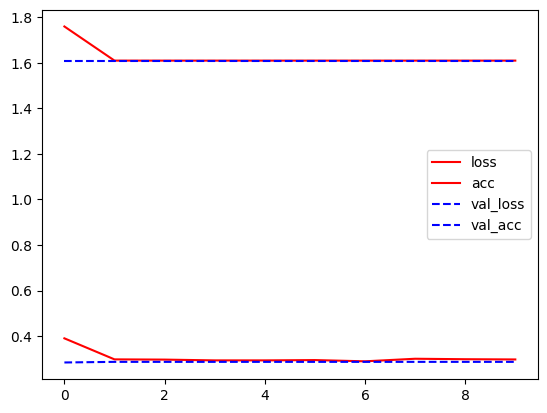

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
plt.plot(hist_df['loss'],'r',label='loss')
plt.plot(hist_df['accuracy'],'r',label='acc')
plt.plot(hist_df['val_loss'],'--b',label='val_loss')
plt.plot(hist_df['val_accuracy'],'--b',label='val_acc')
plt.legend()


###  ▶[Part4.] 오차행렬표 검증표 제작

- 이 자료는 val_ds에서 배치단위로 데이터를 가져오기 때문에...

In [ ]:
X_test,y_test=[],[]
for x, y in val_ds:
    if len(y)==batch_size:
        X_test.append(x.numpy())
        y_test.append(y.numpy())

X_test=np.reshape(X_test, (-1,180,180,3))
y_test=np.reshape(y_test,(-1))


In [ ]:
test_yhat=model.predict(X_test)
# 소프트맥스일때 y값이 원핫인코딩 되어 있다면 아래의 과정1,2가 필요함()
predict_y=np.argmax(test_yhat, axis=1) # [과정1]
real_y=y_test.copy()  # 원핫인코딩 되어 있지 않음으로    

22/22 [==============================] - 1s 33ms/step


In [ ]:
# 오차행렬표임 (교재 388쪽의 하단내용)
import pandas as pd
from sklearn.metrics import confusion_matrix
conMatrix=confusion_matrix(real_y, predict_y)
conMatrix

array([[  0,  41,  20,  65,   0],
       [  0,  39,  32,  96,   2],
       [  0,  33,  13,  70,   0],
       [  0,  36,   1, 107,   0],
       [  0,  50,   5,  94,   0]], dtype=int64)

In [ ]:
## 오차행렬 그래프를 그림으로 필수는 아님
pd.DataFrame(conMatrix)



0   1   2    3  4
0  0  41  20   65  0
1  0  39  32   96  2
2  0  33  13   70  0
3  0  36   1  107  0
4  0  50   5   94  0

In [ ]:

## 오차행렬 그래프를 그림으로 필수는 아님
# 오차행렬표를 데이터프레임으로 변환 (교재 388쪽 가장하단)
# 오차행렬표를 데이터프레임으로 작업하지 않고, 차트로 보여주는 모듈도 있음.
cnt=len(conMatrix)
pd.DataFrame(conMatrix, 
             index=['true_%d' % i for i in range(cnt)],
             columns=['pred_%d' % i for i in range(cnt)] )

pred_0  pred_1  pred_2  pred_3  pred_4
true_0       0      41      20      65       0
true_1       0      39      32      96       2
true_2       0      33      13      70       0
true_3       0      36       1     107       0
true_4       0      50       5      94       0

Text(33.22222222222222, 0.5, 'true label')

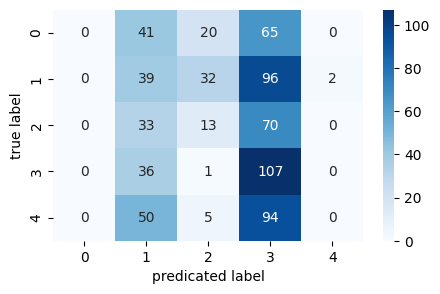

In [ ]:
# 오차행렬표를 차트로 보여주는 작업_혼돈행렬
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(real_y, predict_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.20      0.23      0.21       169
           2       0.18      0.11      0.14       116
           3       0.25      0.74      0.37       144
           4       0.00      0.00      0.00       149

    accuracy                           0.23       704
   macro avg       0.13      0.22      0.14       704
weighted avg       0.13      0.23      0.15       704



c:\Users\user\miniconda3\envs\cpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\miniconda3\envs\cpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\miniconda3\envs\cpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  ▶[Part5.]새로운 데이터로 추론

In [ ]:
from PIL import Image
import numpy as np
img=Image.open('c:/data/a.jpg').resize((180,180)).convert('RGB')
img=np.array(img)

img=np.reshape(img, (1,180,180,3))
result=model.predict(img)
resultBun=np.argmax(result)
class_names[resultBun]

1/1 [==============================] - 0s 21ms/step


'dandelion'

 ▶[Part6.] 모델 저장

In [ ]:
model.save('c:/data/flower.h5')

In [ ]:
yhat = []
for x,y in val_ds.take(len(list(val_ds))):
    for img in x:
        print('-'* 100)
        img = np.array(img)
        img = np.reshape((img,(1,180,180,3)))
        yhat.append(np.argmax(model.prex.difference(img)))
        
# 덴스 층 과적합, 증강은 어떻게 할건가, 여러 모델 비교